In [1]:
# !python3.10 -m pip install [library]

In [2]:
!python3.10 -m pip install scikit-learn

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from get_iris import *
from feature_extractor import *
from train_models import *

2024-11-26 22:06:41.761070: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 22:06:41.771820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 22:06:41.787465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 22:06:41.809665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 22:06:41.815511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 22:06:41.836278: I tensorflow/core/platform/cpu_feature_gu

# Imagen de ejemplo

In [4]:
db_path = '../CASIA-IrisV3'
db_path_interval = db_path + '/CASIA-Iris-Interval'
db_path_lamp     = db_path + '/CASIA-Iris-Lamp'
db_path_twins    = db_path + '/CASIA-Iris-Twins'

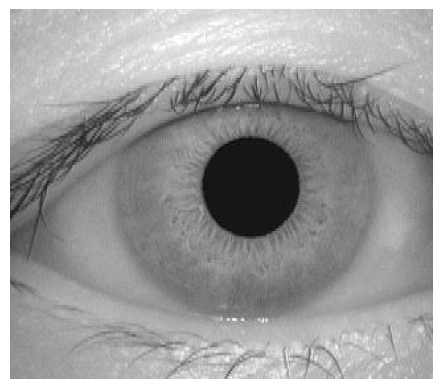

In [5]:
path_ex_casiav1 = '../CASIA-IrisV1/1/001_1_1.jpg'
path_ex_casiav3 = db_path_lamp + '/005/L/S2005L03.jpg'
img1_ex = cv2.imread(path_ex_casiav1, 0)

plt.imshow(img1_ex, cmap='gray')
plt.axis('off')
plt.show()

# Extracción de información desde el iris

Inner circle (x,y,r) = (182.0, 134.0, 37)
Outer circle (x,y,r) = (180.0, 137.0, 99)


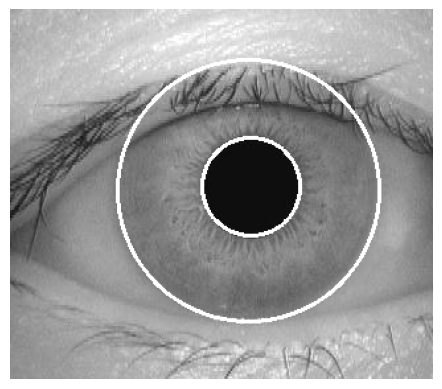

In [6]:
# python-iris-recognition/iris/python/fnc/boundary.py
y_inn, x_inn, r_inn = searchInnerBound(img1_ex)
y_out, x_out, r_out = searchOuterBound(img1_ex, y_inn, x_inn, r_inn)
print(f'Inner circle (x,y,r) = {(x_inn, y_inn, r_inn)}')
print(f'Outer circle (x,y,r) = {(x_out, y_out, r_out)}')

img2_ex = img1_ex.copy()
cv2.circle(img2_ex, (int(x_inn), int(y_inn)), r_inn, (255), thickness=2)
cv2.circle(img2_ex, (int(x_out), int(y_out)), r_out, (255), thickness=2)
plt.imshow(img2_ex, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
segment(img1_ex)

([137, 180, 99],
 [134, 182, 37],
 array([[173., 171., 170., ..., 179., 184., 170.],
        [172., 170., 170., ..., 186., 184., 171.],
        [173., 172., 171., ..., 196., 185., 172.],
        ...,
        [156., 154., 152., ..., 172., 183., 194.],
        [156., 154., 151., ..., 170., 180., 191.],
        [155., 153., 150., ..., 169., 176., 185.]]))

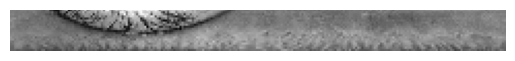

(20, 240)


In [8]:
norm = normalize(img1_ex, x_inn, y_inn, r_inn, x_out, y_out, r_out, 20, 240)
plt.imshow(norm[0], cmap='gray')
plt.axis('off')
plt.show()
print(norm[0].shape)

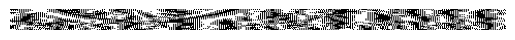

(20, 480)


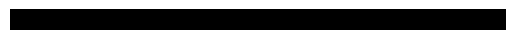

(20, 480)


In [9]:
enc = encode(norm[0], norm[1], minWaveLength, mult, sigmaOnf)

plt.imshow(enc[0],cmap='gray')
plt.axis('off')
plt.show()
print(enc[0].shape)

# Solo son 0s?
plt.imshow(enc[1],cmap='gray')
plt.axis('off')
plt.show()
print(enc[1].shape)

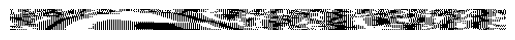

[[  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]
 [255   0 255 ...   0 255   0]
 ...
 [255 255   0 ... 255 255 255]
 [255 255 255 ...   0 255   0]
 [  0   0   0 ... 255   0 255]]


In [10]:
gi = get_iris(path_ex_casiav1)
plt.imshow(gi,cmap='gray')
plt.axis('off')
plt.show()
print(gi)

# Extracción de características

In [11]:
# model_name = 'vgg16'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [12]:
# model_name = 'inception'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [13]:
# model_name = 'resnet50'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [14]:
# model_name = 'mobilenet'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

# Entrenamiento SVM

In [15]:
# model_names = ['vgg16', 'resnet50', 'inception', 'mobilenet']

# for model_name in model_names:
#     ft_path    = f'../features_L/{model_name}'
#     output_dir  = f'../results/svm'
#     out_dir5 = f'../results5/svm'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     if not os.path.exists(out_dir5):
#         os.makedirs(out_dir5)
#     output_file = f'{output_dir}/{model_name}_results.csv'
#     out5_file = f'{out_dir5}/{model_name}_results.csv'

#     train_svm_per_layer(ft_path, output_file, out5_file)

In [ ]:
# model_names = ['vgg16', 'resnet50', 'inception', 'mobilenet']

# for model_name in model_names:
#     ft_path    = f'../features_L/{model_name}'
#     output_dir  = f'../results/rf'
#     out_dir5 = f'../results5/rf'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     if not os.path.exists(out_dir5):
#         os.makedirs(out_dir5)
#     output_file = f'{output_dir}/{model_name}_results.csv'
#     out5_file = f'{out_dir5}/{model_name}_results.csv'
#     train_rf_per_layer(ft_path, output_file, out5_file)

Reading "../features_L/vgg16/block5_pool.csv" with 50 features
Loading features...
Creating datasets...
Normalizing data...
Training RF...
Saving results...
Layer block5_pool: 95.98% Accuracy
Layer block5_pool: 99.16% Accuracy Rank5

Reading "../features_L/vgg16/fc2.csv" with 4097 features
Loading features...
Creating datasets...
Normalizing data...
Training RF...
Saving results...
Layer fc2: 99.83% Accuracy
Layer fc2: 99.83% Accuracy Rank5

Reading "../features_L/vgg16/block4_conv2.csv" with 785 features
Loading features...
Creating datasets...
Normalizing data...
Training RF...
Saving results...
Layer block4_conv2: 98.83% Accuracy
Layer block4_conv2: 99.83% Accuracy Rank5

Reading "../features_L/vgg16/block5_conv3.csv" with 197 features
Loading features...
Creating datasets...
Normalizing data...
Training RF...
Saving results...
Layer block5_conv3: 97.82% Accuracy
Layer block5_conv3: 99.33% Accuracy Rank5

Reading "../features_L/vgg16/block5_conv1.csv" with 197 features
Loading featu

# Visualización de resultados

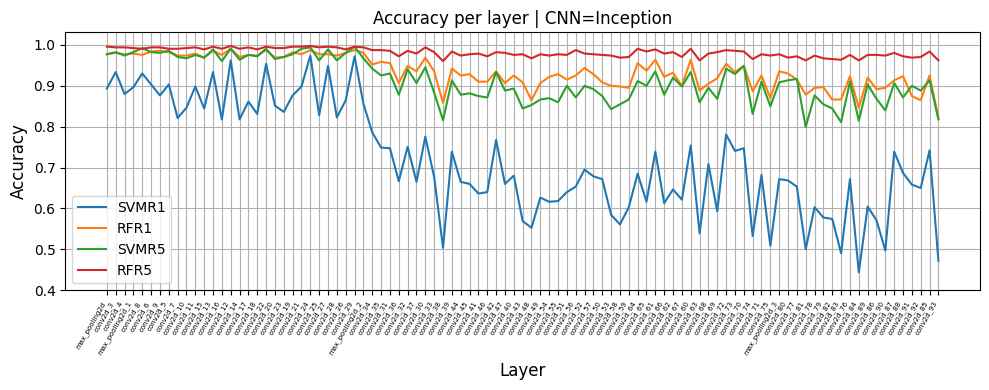

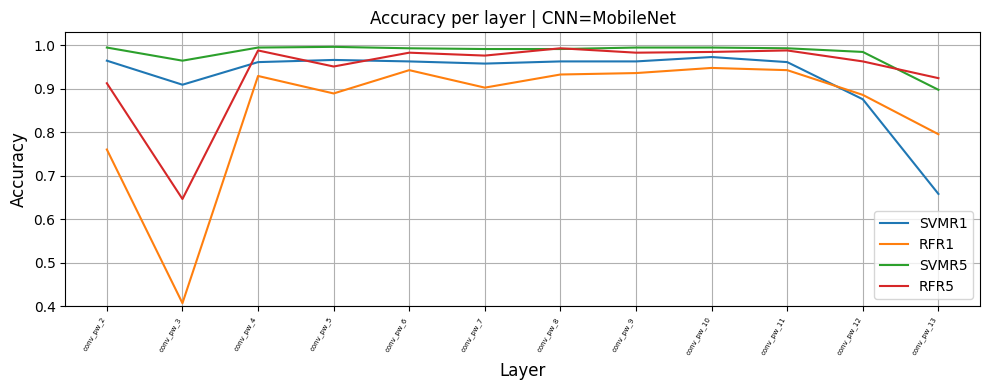

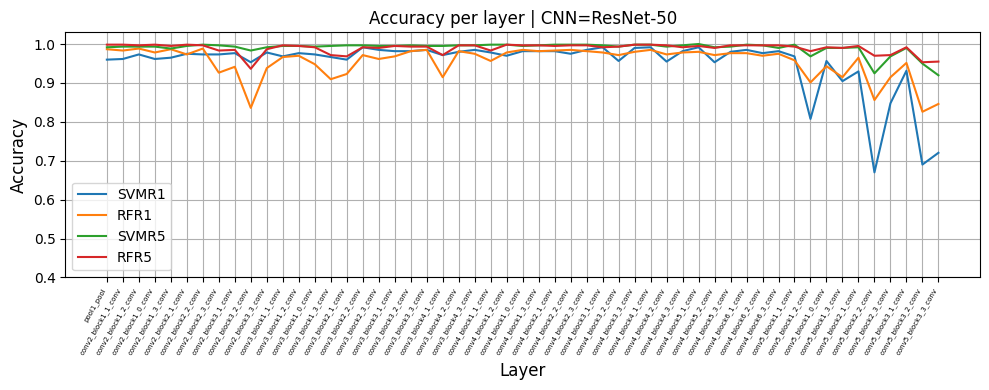

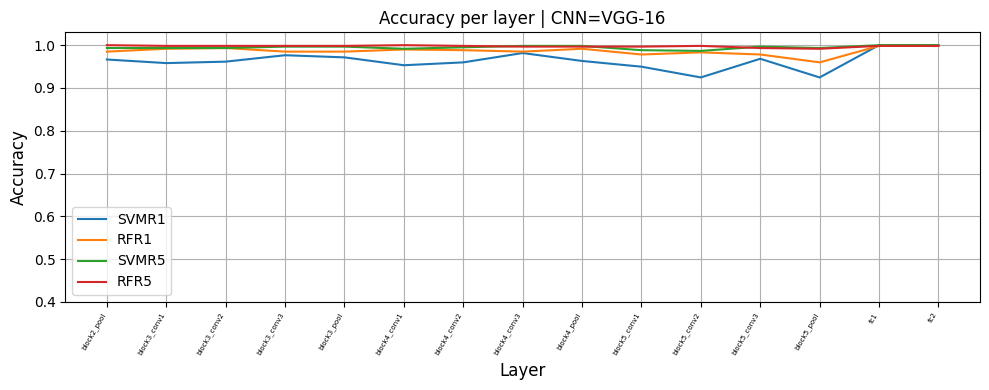

In [53]:
import os
import csv
import matplotlib.pyplot as plt
from feature_extractor import *

res_path   = '../results'
res5_path = '../results5'

model_names = ['Inception', 'MobileNet', 'ResNet-50', 'VGG-16']
csv_svm  = [file for file in os.listdir(f'{res_path}/svm') if file.endswith('.csv')]
csv_rf   = [file for file in os.listdir(f'{res_path}/rf') if file.endswith('.csv')]
csv_svm5  = [file for file in os.listdir(f'{res5_path}/svm') if file.endswith('.csv')]
csv_rf5   = [file for file in os.listdir(f'{res5_path}/rf') if file.endswith('.csv')]

inception_layer_names = []
for layer in model_inception.layers:
        if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D, layers.Dense)):
            inception_layer_names.append(layer.name)
mobilenet_layer_names = []
for layer in model_mobilenet.layers:
        if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D, layers.Dense)):
            mobilenet_layer_names.append(layer.name)
resnet50_layer_names = []
for layer in model_resnet50.layers:
        if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D, layers.Dense)):
            resnet50_layer_names.append(layer.name)
            vgg16_layer_names = []
for layer in model_vgg16.layers:
        if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D, layers.Dense)):
            vgg16_layer_names.append(layer.name)
sorted_layers = [inception_layer_names, mobilenet_layer_names, resnet50_layer_names, vgg16_layer_names]

for i in range(len(model_names)):
    csv_svm_file =  f'{res_path}/svm/{csv_svm[i]}'
    csv_rf_file  =  f'{res_path}/rf/{csv_svm[i]}'
    csv5_svm_file =  f'{res5_path}/svm/{csv_svm[i]}'
    csv5_rf_file  =  f'{res5_path}/rf/{csv_svm[i]}'

    layer_names    = []
    accuracies_svm = []
    accuracies_rf  = []
    accuracies5_svm = []
    accuracies5_rf  = []

    with open(csv_svm_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            layer_names.append(row[0])
            accuracies_svm.append(float(row[1]))
    with open(csv_rf_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            accuracies_rf.append(float(row[1]))
    with open(csv5_svm_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            accuracies5_svm.append(float(row[1]))
    with open(csv5_rf_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            accuracies5_rf.append(float(row[1]))

    model_layer_names = sorted_layers[i]
    model_layer_names = [layer for layer in model_layer_names if layer in layer_names]

    layer_accuracy_map_svm  = {layer: acc for layer, acc in zip(layer_names, accuracies_svm)}
    layer_accuracy_map_rf   = {layer: acc for layer, acc in zip(layer_names, accuracies_rf)}
    layer_accuracy5_map_svm = {layer: acc for layer, acc in zip(layer_names, accuracies5_svm)}
    layer_accuracy5_map_rf  = {layer: acc for layer, acc in zip(layer_names, accuracies5_rf)}

    sorted_accuracies_svm  = [layer_accuracy_map_svm[layer] for layer in model_layer_names if layer in layer_accuracy_map_svm]
    sorted_accuracies_rf   = [layer_accuracy_map_rf[layer] for layer in model_layer_names if layer in layer_accuracy_map_rf]
    sorted_accuracies5_svm = [layer_accuracy5_map_svm[layer] for layer in model_layer_names if layer in layer_accuracy5_map_svm]
    sorted_accuracies5_rf  = [layer_accuracy5_map_rf[layer] for layer in model_layer_names if layer in layer_accuracy5_map_rf]




    x = range(len(layer_names))

    plt.figure(figsize=(10, 4))
    # plt.bar([p - width/2 for p in x], accuracies_svm, width=width, label="SVM")
    # plt.bar([p + width/2 for p in x], accuracies_rf, width=width, label="RF") 
    plt.plot(x, sorted_accuracies_svm, label='SVMR1')
    plt.plot(x, sorted_accuracies_rf, label='RFR1')
    plt.plot(x, sorted_accuracies5_svm, label='SVMR5')
    plt.plot(x, sorted_accuracies5_rf, label='RFR5')
    plt.ylim(0.4,1.03)
    plt.xlabel("Layer", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(f"Accuracy per layer | CNN={model_names[i]}")
    plt.xticks(ticks=x, labels=model_layer_names, rotation=60, ha='right', fontsize=5)
    plt.tight_layout() 
    plt.grid('True')
    plt.legend()
    plt.show()
    print()